## 3. Fundamental analysis using Regression.

In [1]:
# Import necessary libraries and loading data.
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
gold_df = pd.read_csv("C:/Users/pedin/Desktop/Git/ML-Internship-Modules/GOLD.csv")
gold_df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [2]:
# Printing the dimensions of data.
gold_df.shape

(512, 9)

In [3]:
# Checking for null values.
gold_df.isnull().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.          0
Change %      0
Pred        101
new           0
dtype: int64

In [4]:
# Inspecting the datatypes of variables.
gold_df.dtypes

Date         object
Price         int64
Open          int64
High          int64
Low           int64
Vol.         object
Change %     object
Pred        float64
new         float64
dtype: object

In [5]:
# Removing unnecessary symbols in cells.
gold_df.replace(['K','%'],"",regex=True,inplace=True)
# Correcting the datatype of variables.
gold_df['Vol.'] = gold_df['Vol.'].astype('float64')
gold_df['Change %'] = gold_df['Change %'].astype('float64')
gold_df['Date'] = gold_df['Date'].astype('datetime64')
# Setting the 'Date' as index column.
gold_df.set_index('Date',inplace=True)
gold_df.head()

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08,-1.79,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06,0.44,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85,-0.23,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10,-0.49,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28,0.09,124.0,112.153318


In [6]:
# Confirming the datatypes.
gold_df.dtypes

Price         int64
Open          int64
High          int64
Low           int64
Vol.        float64
Change %    float64
Pred        float64
new         float64
dtype: object

In [7]:
# Printing stats.
gold_df.describe()

,Price,Open,High,Low,Vol.,Change %,Pred,new
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,411.000000,512.000000
mean,30364.583984,30368.412109,30491.089844,30243.320312,7.653516,0.019883,341.712895,245.161859
std,1284.378623,1296.856656,1307.031684,1271.936410,4.137838,0.573099,271.075609,205.788897
min,27812.000000,27805.000000,27887.000000,27620.000000,0.020000,-1.790000,-146.000000,11.109814
25%,29432.500000,29436.750000,29499.750000,29345.750000,5.770000,-0.330000,156.500000,101.369172
50%,30427.500000,30399.500000,30545.000000,30286.000000,7.770000,0.005000,299.000000,184.537244
75%,31271.750000,31300.000000,31447.500000,31160.750000,10.302500,0.330000,475.000000,320.835031
max,33753.000000,34247.000000,34400.000000,33680.000000,23.800000,1.990000,2210.000000,1407.321485


### 3.1.1 Using linear regression to find the coefficients of inputs(OHLC prices) and using same trained model to fill the entire column('Pred')

Let's first seperate the rows with missing data into seperate dataframe.

In [8]:
gold_df_missing = gold_df[['Price','Open','High','Low','Pred']][gold_df['Pred'].isnull()== True]
print(gold_df_missing.shape)
gold_df_missing.head()

(101, 5)


,Price,Open,High,Low,Pred
Date,,,,,
2018-12-11,31812,31850,31850,31618,NaN
2018-12-12,31626,31749,31749,31582,NaN
2018-12-13,31414,31550,31600,31337,NaN
2018-12-14,31437,31440,31514,31384,NaN
2018-12-17,31501,31369,31530,31291,NaN


Now let's build the model with the remaining data.

In [9]:
gold_df_pred = gold_df[['Price','Open','High','Low','Pred']][gold_df['Pred'].isnull()!= True]
print(gold_df_pred.shape)
gold_df_pred.head()

(411, 5)


,Price,Open,High,Low,Pred
Date,,,,,
2017-05-04,28060,28400,28482,28025,738.0
2017-05-05,28184,28136,28382,28135,-146.0
2017-05-08,28119,28145,28255,28097,30.0
2017-05-09,27981,28125,28192,27947,357.0
2017-05-10,28007,28060,28146,27981,124.0


As the input variables are in the same scale there is no need of feature scaling( such as Minmax scaling and Normalization).

In [10]:
# Model-1 for 'Pred' column.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(gold_df_pred.drop('Pred',axis=1),gold_df_pred['Pred'],test_size=0.3,random_state=0)
lr_model_1 = LinearRegression()
lr_model_1.fit(X_train_1,y_train_1)
print("Coefficients of inputs are:",lr_model_1.coef_)

Coefficients of inputs are: [ 2.  3. -1. -4.]


In [11]:
# Checking accuracy.
from sklearn.metrics import mean_squared_error,r2_score
y_pred_1 = lr_model_1.predict(X_test_1)
print("Mean-squared-error",mean_squared_error(y_test_1,y_pred_1))
print("R-squared:",r2_score(y_test_1,y_pred_1))

Mean-squared-error 2.2917186879409384e-22
R-squared: 1.0


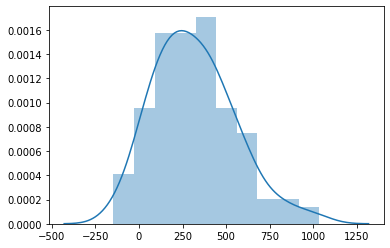

In [12]:
sns.distplot(y_pred_1)

Let's now predict the missing data in `gold_df_missing` and fill the 'Pred' Column.

In [13]:
gold_df_missing['Pred'] = lr_model_1.predict(gold_df_missing.drop('Pred',axis=1))
gold_df_missing.head()

,Price,Open,High,Low,Pred
Date,,,,,
2018-12-11,31812,31850,31850,31618,852.0
2018-12-12,31626,31749,31749,31582,422.0
2018-12-13,31414,31550,31600,31337,530.0
2018-12-14,31437,31440,31514,31384,144.0
2018-12-17,31501,31369,31530,31291,415.0


### 3.1.2 Using new linear regression model to fit 'new' column.

In [14]:
gold_df_new = gold_df[['Price','Open','High','Low','new']]
gold_df_new.head()

,Price,Open,High,Low,new
Date,,,,,
2017-05-04,28060,28400,28482,28025,117.570740
2017-05-05,28184,28136,28382,28135,295.430176
2017-05-08,28119,28145,28255,28097,132.123714
2017-05-09,27981,28125,28192,27947,101.298064
2017-05-10,28007,28060,28146,27981,112.153318


In [15]:
gold_df_new.shape

(512, 5)

In [16]:
# Model-2 for 'new' column.
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(gold_df_new.drop('new',axis=1),gold_df_new['new'],test_size=0.3,random_state=0)
lr_model_2 = LinearRegression()
lr_model_2.fit(X_train_2,y_train_2)
print("Coefficients are:",lr_model_2.coef_)

Coefficients are: [ 1.01319701 -1.00038716  1.00529137 -1.01816907]


In [17]:
# Checking accuracy.
y_pred_2 = lr_model_2.predict(X_test_2)
print("Mean-squared-error",mean_squared_error(y_test_2,y_pred_2))
print("R-squared value:",r2_score(y_test_2,y_pred_2))

Mean-squared-error 0.27118056331158524
R-squared value: 0.9999916114573493


#### Let's now find which is a linear function and which is polynomial

In [18]:
# Let's import necessary libraries.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [19]:
# Polynomial function for 'Pred' column.
poly_model_1 = make_pipeline(PolynomialFeatures(2),LinearRegression())
poly_model_1.fit(X_train_1,y_train_1)
poly_pred_1 = poly_model_1.predict(X_test_1)
print("Mean-squared-error:",mean_squared_error(y_test_1,poly_pred_1))
print("R-squared:",r2_score(y_test_1,poly_pred_1))

Mean-squared-error: 9.690866514558508e-17
R-squared: 1.0


The mean-squared-error increased by fitting polynomial funtion to 'Pred' column which inturn indicates that `'Pred'` is a column with`linear function`.

In [20]:
# Polynomial funtion for 'new' column.
poly_model_2 = make_pipeline(PolynomialFeatures(2),LinearRegression())
poly_model_2.fit(X_train_2,y_train_2)
poly_pred_2 = poly_model_2.predict(X_test_2)
print("Mean-squared-error:",mean_squared_error(y_test_2,poly_pred_2))
print("R-squared value:",r2_score(y_test_2,poly_pred_2))

Mean-squared-error: 0.0003150136234642663
R-squared value: 0.9999999902555509


As we can see the Mean-squared-error `decreased` and R-Squared value `increased` by using polynomial funtion in `'new'` column.

In [21]:
print("For 'Pred' column\n")
print("MSE for linear function:",mean_squared_error(y_test_1,y_pred_1))
print("R-Squared for linear function:",r2_score(y_test_1,y_pred_1))
print("\nMSE for polynomial function:",mean_squared_error(y_test_1,poly_pred_1))
print("R-Squared for polynomial function:",r2_score(y_test_1,poly_pred_1))
print("\n**************")
print("\nFor 'new' column")
print("\nMSE for linear function:",mean_squared_error(y_test_2,y_pred_2))
print("R-Squared for linear function:",r2_score(y_test_2,y_pred_2))
print("\nMSE for polynomial function:",mean_squared_error(y_test_2,poly_pred_2))
print("R-Squared for polynomial function:",r2_score(y_test_2,poly_pred_2))

For 'Pred' column

MSE for linear function: 2.2917186879409384e-22
R-Squared for linear function: 1.0

MSE for polynomial function: 9.690866514558508e-17
R-Squared for polynomial function: 1.0

**************

For 'new' column

MSE for linear function: 0.27118056331158524
R-Squared for linear function: 0.9999916114573493

MSE for polynomial function: 0.0003150136234642663
R-Squared for polynomial function: 0.9999999902555509


**Report:**

- 'Pred' column is a `Linear` function.
- 'new' column is a `Polynomial` function.

### 3.2 Calculating daily and monthly Beta values using Regression.

In [22]:
# Let's import stocks data.
Apollo_df = pd.read_csv("D:/Datasets/APOLLOTYRE.csv")
Nifty_df = pd.read_csv("D:/Datasets/Nifty50.csv")
Apollo_df['Date'] = Apollo_df['Date'].astype('datetime64')
Apollo_df.set_index('Date',inplace=True)
Apollo_df.head()                          

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,APOLLOTYRE,EQ,227.05,227.6,232.40,225.05,231.55,231.90,230.08,4347614,1.000315e+09,40744,1801217,41.43
2017-05-16,APOLLOTYRE,EQ,231.90,232.0,235.35,230.70,234.10,234.40,233.88,3426685,8.014455e+08,29264,1570680,45.84
2017-05-17,APOLLOTYRE,EQ,234.40,234.1,239.05,231.70,237.60,237.35,236.18,5219959,1.232859e+09,50958,1845182,35.35
2017-05-18,APOLLOTYRE,EQ,237.35,235.1,239.90,230.05,230.80,232.65,235.29,3965961,9.331699e+08,34539,1615604,40.74
2017-05-19,APOLLOTYRE,EQ,232.65,234.4,237.75,230.10,234.00,234.65,234.28,5363574,1.256552e+09,48236,3057294,57.00


In [23]:
Nifty_df['Date'] = Nifty_df['Date'].astype('datetime64')
Nifty_df.set_index('Date',inplace=True)
Nifty_df.tail()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2019-05-07,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
2019-05-08,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
2019-05-09,11322.40,11357.60,11255.05,11301.80,373028059,17602.86
2019-05-10,11314.15,11345.80,11251.05,11278.90,387323416,18085.19
2019-05-13,11258.70,11300.20,11125.60,11148.20,357586433,16722.91


#### 3.2.1 Daily returns for the past 3 months.

In [24]:
Apollo_daily_df = Apollo_df.loc["2019-02-13":]
Apollo_daily_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2019-02-13,APOLLOTYRE,EQ,200.9,201.0,203.85,198.50,199.20,199.5,201.48,2357127,4.749098e+08,33547,389206,16.51
2019-02-14,APOLLOTYRE,EQ,199.5,198.2,204.35,197.45,203.40,202.7,200.57,2090637,4.193248e+08,22592,313102,14.98
2019-02-15,APOLLOTYRE,EQ,202.7,202.8,202.90,196.70,200.30,200.4,199.25,2385065,4.752315e+08,19894,714630,29.96
2019-02-18,APOLLOTYRE,EQ,200.4,200.5,203.80,199.65,202.35,202.7,202.02,1647484,3.328201e+08,15482,490620,29.78
2019-02-19,APOLLOTYRE,EQ,202.7,202.5,208.95,201.55,202.35,202.4,205.84,2764354,5.690198e+08,27258,320063,11.58


In [25]:
Nifty_daily_df = Nifty_df.loc["2019-02-13":]
Nifty_daily_df.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2019-02-13,10870.55,10891.65,10772.10,10793.65,321958549,15360.98
2019-02-14,10786.10,10792.70,10718.75,10746.05,627041405,20797.41
2019-02-15,10780.25,10785.75,10620.40,10724.40,521876968,20733.95
2019-02-18,10738.65,10759.90,10628.40,10640.95,345440240,14903.19
2019-02-19,10636.70,10722.85,10585.65,10604.35,291507060,13765.01


In [26]:
# Joining closing prices of two datasets.
close_prices = pd.DataFrame()
close_prices['Apollo'] = Apollo_daily_df['Close Price']
close_prices['Nifty'] = Nifty_daily_df['Close']
close_prices.head()

,Apollo,Nifty
Date,,
2019-02-13,199.5,10793.65
2019-02-14,202.7,10746.05
2019-02-15,200.4,10724.40
2019-02-18,202.7,10640.95
2019-02-19,202.4,10604.35


In [27]:
daily_returns = close_prices.pct_change().dropna()
daily_returns.head()

,Apollo,Nifty
Date,,
2019-02-14,0.016040,-0.004410
2019-02-15,-0.011347,-0.002015
2019-02-18,0.011477,-0.007781
2019-02-19,-0.001480,-0.003440
2019-02-20,0.033103,0.012363


In [28]:
# Import libraries.
import statsmodels.api as sm
# Assigning dependent and independent variables.
X = daily_returns['Nifty']
y = daily_returns['Apollo']
# Adding constant to independent variable.
X_c = sm.add_constant(X)
B_model = sm.OLS(y,X_c).fit()
# Print summary statistics.
print(B_model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Apollo   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     15.84
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           0.000204
Time:                        17:18:16   Log-Likelihood:                 157.97
No. Observations:                  57   AIC:                            -311.9
Df Residuals:                      55   BIC:                            -307.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0018      0.002     -0.860      0.3

In [29]:
print("The Daily Beta value for the past 3 months is:",B_model.params[1])

The Daily Beta value for the past 3 months is: 1.185026830644564


#### 3.2.2 Calculating monthly Beta value.

In [30]:
close_price_overall = pd.concat([Apollo_df['Close Price'],Nifty_df['Close']],axis=1)
close_price_overall.head()

,Close Price,Close
Date,,
2017-05-15,231.90,9445.40
2017-05-16,234.40,9512.25
2017-05-17,237.35,9525.75
2017-05-18,232.65,9429.45
2017-05-19,234.65,9427.90


In [31]:
monthly_price = close_price_overall.groupby([close_price_overall.index.to_period('M')]).sum()
monthly_price.columns = ['Apollo','Nifty']
monthly_price.head()

,Apollo,Nifty
Date,,
2017-05,2998.10,123481.25
2017-06,5316.05,201746.05
2017-07,5382.05,206852.50
2017-08,5557.50,207924.85
2017-09,5335.10,209536.25


In [32]:
monthly_returns = monthly_price.pct_change().dropna()
monthly_returns.head()

,Apollo,Nifty
Date,,
2017-06,0.773140,0.633819
2017-07,0.012415,0.025311
2017-08,0.032599,0.005184
2017-09,-0.040018,0.007750
2017-10,-0.093185,-0.032275


In [33]:
# Assigning dependent and independent variables.
X1 = monthly_returns['Nifty']
y1 = monthly_returns['Apollo']
# Adding constant to independent variable.
X1_c = sm.add_constant(X1)
B_model_2 = sm.OLS(y1,X1_c).fit()
# Print summary statistics.
print(B_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Apollo   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     513.1
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           9.73e-17
Time:                        17:18:16   Log-Likelihood:                 39.890
No. Observations:                  24   AIC:                            -75.78
Df Residuals:                      22   BIC:                            -73.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0099      0.010     -1.013      0.3

In [34]:
print("The monthly Beta value is:",B_model_2.params[1])

The monthly Beta value is: 1.135291209822876


**Inferences:**
- Beta value measures the volatility of a stock compared with the volatility of the market as a whole.
- Stocks that have a high or positive beta coefficient are riskier and more volatile than those with a lower beta value.
- An investment with zero beta means no volatility and no risk.
- A negative beta correlation means an investment moves in the opposite direction from the stock market. When the market rises, a negative-beta investment generally falls. When the market falls, the negative-beta investment will tend to rise. 

From our regression results it is clear that the `Apollo` stocks are highly volatile.